## 8장 수치 시뮬레이션으로 소비자의 행동을 예측하는 테크닉 10

#### 1. 인간관계 네트워크를 가시화

In [3]:
import pandas as pd
df_links = pd.read_csv('links.csv')
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


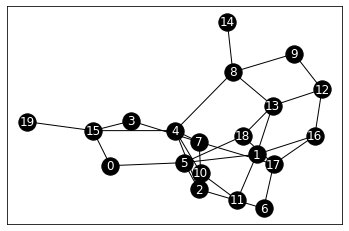

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

#그래프 객체 생성
G = nx.Graph()

#노드 설정
NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip('Node')
    #print(node_no)
    G.add_node(str(node_no))
    
#엣지 설정
for i in range(NUM):
    for j in range(NUM):
        #print(i, j)
        node_name = 'Node' + str(j)
        
        if df_links[node_name].iloc[i] == 1:
            G.add_edge(str(i), str(j))
            
#그리기
nx.draw_networkx(G, node_color = 'k', edge_color = 'k', font_color = 'w')
plt.show()

#### 2. 입소문에 의한 정보 전파 모습 가시화

In [6]:
import numpy as np

In [7]:
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [8]:
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                node_name = 'Node' + str(j)
                if df_links[node_name].iloc[i] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    return list_active

In [10]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation (NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())